Saving SI_L06_KNN_DATASET.csv to SI_L06_KNN_DATASET (3).csv
------------ Exploracion inicial del dataset ------------

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  

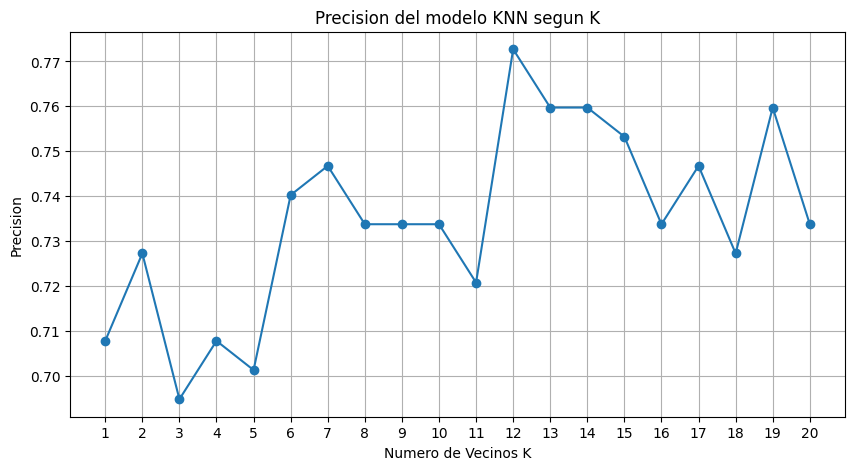

Mejor valor de K: 12 con precision 0.7727

------------ Evaluacion final del modelo con mejor K ------------

Precision con K=12: 0.7727
Matriz de Confusion:
[[88 12]
 [23 31]]
Reporte de Clasificacion:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154


------------ Visualizar la distribucion de los datos y analizar la relación entre variables relevantes ------------



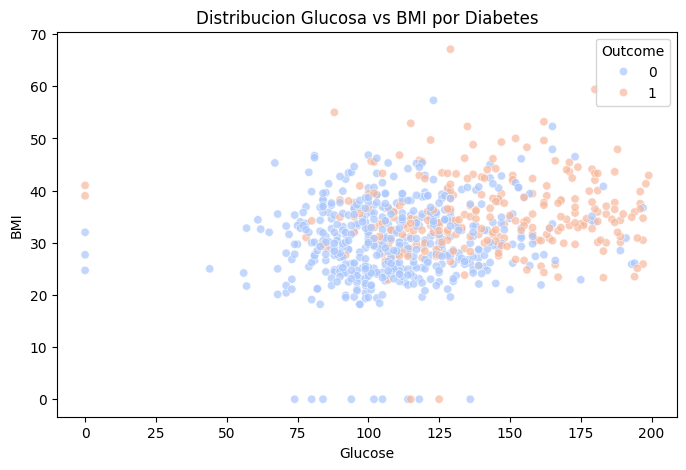

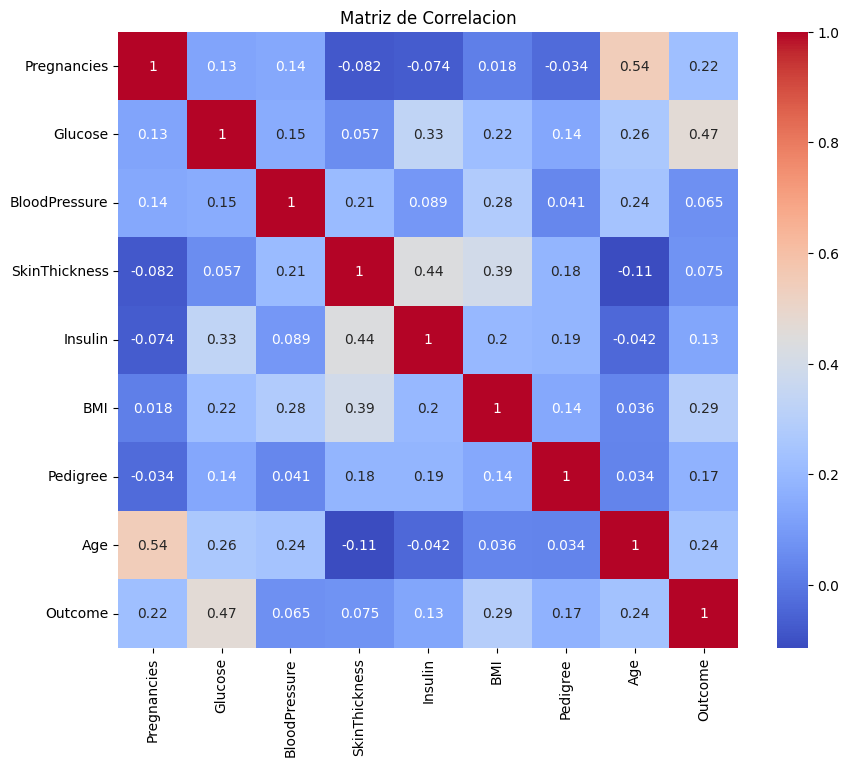


------------ Optimizar el modelo y comparar KNN con otros algoritmos de clasificacion ------------

Regresion Logistica precision: 0.7143
Arbol de Decision precision: 0.7208
Random Forest precision: 0.7597
KNN (k=12) precision: 0.7727


In [4]:
# Importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Cargar dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
data = pd.read_csv('SI_L06_KNN_DATASET.csv')

# Exploracion inicial del dataset
print("------------ Exploracion inicial del dataset ------------\n")
print(data.head())
print()
print(data.info())
print()
print(data.describe())
print("\n---------------------------------------------------------\n")

# -----------------------------------------------
# Entrenar un modelo KNN para predecir la variable Outcome (diabetes: si o no)
# -----------------------------------------------

X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar caracteristicas para mejorar el desempeño de KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------------------------
print("\n------------ Evaluar la precision del modelo y determinar el numero optimo de vecinos K ------------\n")
# -----------------------------------------------

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Graficar la precision para cada K
plt.figure(figsize=(10,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Numero de Vecinos K')
plt.ylabel('Precision')
plt.title('Precision del modelo KNN segun K')
plt.grid(True)
plt.xticks(k_values)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f'Mejor valor de K: {best_k} con precision {max(accuracies):.4f}')

# -----------------------------------------------
# Entrenar el modelo KNN con el mejor K
# -----------------------------------------------

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# -----------------------------------------------
print("\n------------ Evaluacion final del modelo con mejor K ------------\n")
# -----------------------------------------------

print(f'Precision con K={best_k}: {accuracy_score(y_test, y_pred_best):.4f}')
print('Matriz de Confusion:')
print(confusion_matrix(y_test, y_pred_best))
print('Reporte de Clasificacion:')
print(classification_report(y_test, y_pred_best))

# -----------------------------------------------
print("\n------------ Visualizar la distribucion de los datos y analizar la relación entre variables relevantes ------------\n")
# -----------------------------------------------

# Visualizar relaciones entre variables relevantes y Outcome

plt.figure(figsize=(8,5))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data, palette='coolwarm', alpha=0.7)
plt.title('Distribucion Glucosa vs BMI por Diabetes')
plt.show()

# Matriz de correlacion (puedes dejarla para referencia general)
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlacion')
plt.show()

# -----------------------------------------------
print("\n------------ Optimizar el modelo y comparar KNN con otros algoritmos de clasificacion ------------\n")
# -----------------------------------------------

models = {
    'Regresion Logistica': LogisticRegression(max_iter=1000),
    'Arbol de Decision': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    f'KNN (k={best_k})': KNeighborsClassifier(n_neighbors=best_k)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} precision: {acc:.4f}')
